# Explotatory Data Analysis

1. [General info about dataset and its variables](#General-info-about-dataset-and-its-variables)
    * [Reading data](#Read-data-from-.cvs-file)
    * [General information exploration](#General-information-exploration)
    * [Continuous variables](#Continuous-variables-exploration )
    * [Categorical variables](#Categorical-variables)
2. [Bivariate analysis](#Bivariate-analysis)
    * [Continuous variables](#Relationship-between-continuous-variables)
    * [Categorical variables](#Relationship-between-categorical-variables)
3. [Other plots from data](#Plots)
4. [Conclusion](#Conclusion)

In this article I would like to take a look at the data we have in the dutch primary school dataset. I want to investigate what variables I have, do I have some outliers or not and also is there any relationship between features.

## General info about dataset and its variables

### Read data from .cvs file

In [190]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

data = pd.read_csv("./make_school_data/main/output/Score.csv", error_bad_lines=False, sep=',', encoding = "ISO-8859-1") 

### General information exploration

In [191]:
print(data.shape)
print(data.columns)
data.head()

(31300, 33)
Index(['SCHOOL_ID', 'DATUM', 'INSTELLINGSNAAM_VESTIGING', 'POSTCODE_VESTIGING',
       'PLAATSNAAM', 'GEMEENTENAAM', 'PROVINCIE', 'SOORT_PO',
       'DENOMINATIE_VESTIGING', 'EXAMEN', 'EXAMEN_AANTAL', 'EXAMEN_GEM',
       'REKENEN_LAGER1F', 'REKENEN_1F', 'REKENEN_1S', 'REKENEN_2F',
       'LV_LAGER1F', 'LV_1F', 'LV_2F', 'TV_LAGER1F', 'TV_1F', 'TV_2F', 'VSO',
       'PRO', 'VMBO', 'VMBO_HAVO', 'HAVO', 'HAVO_VWO', 'VWO',
       'ADVIES_NIET_MOGELIJK', 'TOTAAL_ADVIES', 'LJ8', 'ZIT'],
      dtype='object')


,SCHOOL_ID,DATUM,INSTELLINGSNAAM_VESTIGING,POSTCODE_VESTIGING,PLAATSNAAM,GEMEENTENAAM,PROVINCIE,SOORT_PO,DENOMINATIE_VESTIGING,EXAMEN,...,PRO,VMBO,VMBO_HAVO,HAVO,HAVO_VWO,VWO,ADVIES_NIET_MOGELIJK,TOTAAL_ADVIES,LJ8,ZIT
0,000AP_2015,2015,De Schanskorf,2715BT,ZOETERMEER,Zoetermeer,Zuid-Holland,Bo,Gereformeerd vrijgemaakt,CET,...,0,1,0,5,1,1,0,11,13,0
1,000AR_2015,2015,"BS ""De Maasparel""",6109AM,OHE EN LAAK,Maasgouw,Limburg,Bo,Rooms-Katholiek,CET,...,0,1,0,7,0,6,0,18,17,0
2,000AZ_2015,2015,De Kiezel en de Kei,2971AR,BLESKENSGRAAF CA,Molenwaard,Zuid-Holland,Bo,Openbaar,CET,...,1,3,5,3,2,4,0,22,19,3
3,000BA_2015,2015,OBS De Klimboom,6666EB,HETEREN,Overbetuwe,Gelderland,Bo,Openbaar,CET,...,1,1,0,1,4,0,0,12,24,5
4,000BB_2015,2015,Obs Letterwies,9944AR,NIEUWOLDA,Oldambt,Groningen,Bo,Openbaar,CET,...,0,7,0,5,0,2,0,16,15,2


In [192]:
print(data.nunique(axis=0))
data.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

SCHOOL_ID                    31300
DATUM                            5
INSTELLINGSNAAM_VESTIGING     6287
POSTCODE_VESTIGING            6499
PLAATSNAAM                    1844
GEMEENTENAAM                   413
PROVINCIE                       12
SOORT_PO                         2
DENOMINATIE_VESTIGING           17
EXAMEN                           7
EXAMEN_AANTAL                  132
EXAMEN_GEM                   14244
REKENEN_LAGER1F                 31
REKENEN_1F                      68
REKENEN_1S                      88
REKENEN_2F                      59
LV_LAGER1F                      18
LV_1F                           50
LV_2F                          113
TV_LAGER1F                      31
TV_1F                           66
TV_2F                           98
VSO                             16
PRO                             32
VMBO                            48
VMBO_HAVO                       26
HAVO                            45
HAVO_VWO                        31
VWO                 

,DATUM,EXAMEN_AANTAL,EXAMEN_GEM,REKENEN_LAGER1F,REKENEN_1F,REKENEN_1S,REKENEN_2F,LV_LAGER1F,LV_1F,LV_2F,...,PRO,VMBO,VMBO_HAVO,HAVO,HAVO_VWO,VWO,ADVIES_NIET_MOGELIJK,TOTAAL_ADVIES,LJ8,ZIT
count,31300.000000,31300.000000,31300.000000,31300.000000,31300.000000,31300.000000,31300.000000,31300.000000,31300.000000,31300.000000,...,31300.000000,31300.000000,31300.000000,31300.000000,31300.000000,31300.000000,31300.000000,31300.000000,31300.000000,31300.000000
mean,2017.018818,27.589904,399.593409,1.896741,9.936709,8.896326,1.374026,0.465304,5.412875,16.225623,...,0.395719,5.645911,2.177348,5.458562,2.478594,5.804217,0.142077,28.463482,21.855974,2.482300
std,1.400569,17.059502,196.257453,2.675862,8.878866,10.018202,4.616997,1.167952,5.478845,14.902800,...,1.516142,4.714144,2.688906,4.739689,3.272615,6.061055,1.420359,17.463933,19.278557,2.909880
min,2015.000000,5.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.000000,15.000000,197.370536,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000,5.000000,...,0.000000,2.000000,0.000000,2.000000,0.000000,2.000000,0.000000,16.000000,6.000000,0.000000
50%,2017.000000,24.000000,532.818182,1.000000,9.000000,6.000000,0.000000,0.000000,4.000000,14.000000,...,0.000000,5.000000,1.000000,4.000000,1.000000,4.000000,0.000000,25.000000,20.000000,2.000000
75%,2018.000000,35.000000,536.545455,3.000000,15.000000,13.000000,0.000000,0.000000,8.000000,24.000000,...,0.000000,8.000000,3.000000,8.000000,4.000000,8.000000,0.000000,37.000000,31.000000,4.000000
max,2019.000000,163.000000,758.533333,35.000000,82.000000,106.000000,63.000000,20.000000,54.000000,125.000000,...,36.000000,51.000000,28.000000,67.000000,35.000000,109.000000,102.000000,227.000000,161.000000,53.000000


We have 31300 observations and 33 variables. From the last table with descriptive statistics we can see that some of the columns (like EXAMEN_AANTAL, REKENEN_LAGER1F, REKENEN_1F, REKENEN_1S, etc.) has max value much bigger then mean, standart deviation or min value, it could means that this variables have outliers or don't follow normal distribution. Let's analyse them first.


### Continuous variables exploration 

In [193]:
numeric_data = data.select_dtypes(include=[np.number])
print(numeric_data.columns)
numeric_data.head()

Index(['DATUM', 'EXAMEN_AANTAL', 'EXAMEN_GEM', 'REKENEN_LAGER1F', 'REKENEN_1F',
       'REKENEN_1S', 'REKENEN_2F', 'LV_LAGER1F', 'LV_1F', 'LV_2F',
       'TV_LAGER1F', 'TV_1F', 'TV_2F', 'VSO', 'PRO', 'VMBO', 'VMBO_HAVO',
       'HAVO', 'HAVO_VWO', 'VWO', 'ADVIES_NIET_MOGELIJK', 'TOTAAL_ADVIES',
       'LJ8', 'ZIT'],
      dtype='object')


,DATUM,EXAMEN_AANTAL,EXAMEN_GEM,REKENEN_LAGER1F,REKENEN_1F,REKENEN_1S,REKENEN_2F,LV_LAGER1F,LV_1F,LV_2F,...,PRO,VMBO,VMBO_HAVO,HAVO,HAVO_VWO,VWO,ADVIES_NIET_MOGELIJK,TOTAAL_ADVIES,LJ8,ZIT
0,2015,11,534.3,0,0,0,0,0,0,0,...,0,1,0,5,1,1,0,11,13,0
1,2015,18,539.8,0,0,0,0,0,0,0,...,0,1,0,7,0,6,0,18,17,0
2,2015,22,532.9,0,0,0,0,0,0,0,...,1,3,5,3,2,4,0,22,19,3
3,2015,11,536.2,0,0,0,0,0,0,0,...,1,1,0,1,4,0,0,12,24,5
4,2015,16,531.3,0,0,0,0,0,0,0,...,0,7,0,5,0,2,0,16,15,2


We can see that DATUM is actually categorical variable, so we need to remove it from *numeric_data*, but everything else is continuous, so let's take a look at their distributions:

In [194]:
numeric_data.drop('DATUM', 1, inplace = True)
print(numeric_data.columns)

Index(['EXAMEN_AANTAL', 'EXAMEN_GEM', 'REKENEN_LAGER1F', 'REKENEN_1F',
       'REKENEN_1S', 'REKENEN_2F', 'LV_LAGER1F', 'LV_1F', 'LV_2F',
       'TV_LAGER1F', 'TV_1F', 'TV_2F', 'VSO', 'PRO', 'VMBO', 'VMBO_HAVO',
       'HAVO', 'HAVO_VWO', 'VWO', 'ADVIES_NIET_MOGELIJK', 'TOTAAL_ADVIES',
       'LJ8', 'ZIT'],
      dtype='object')


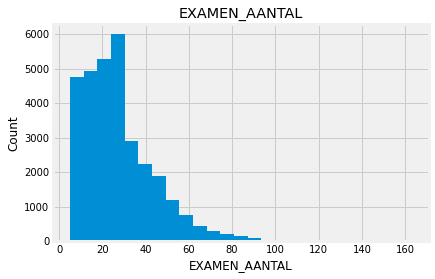

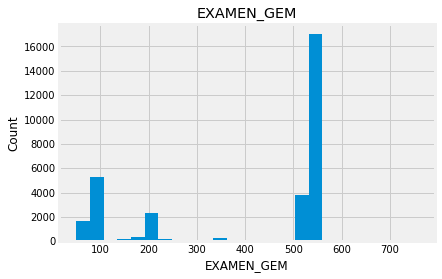

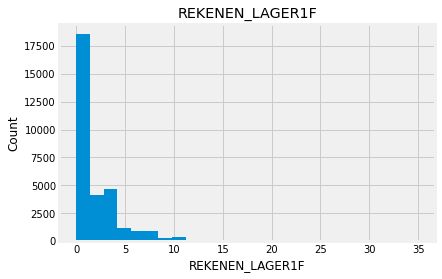

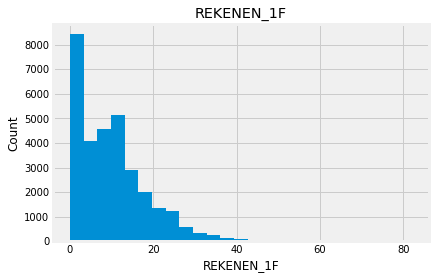

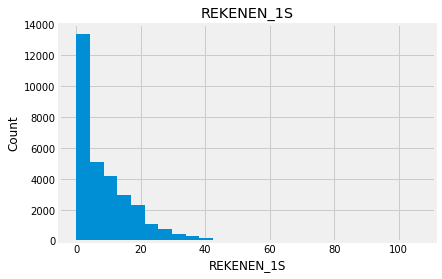

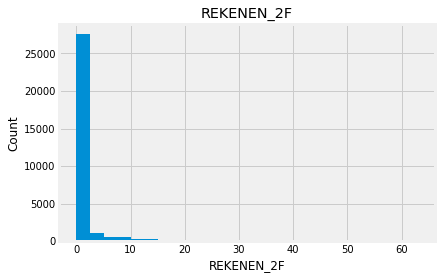

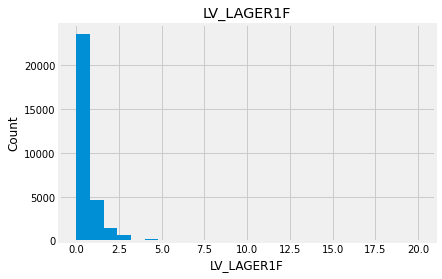

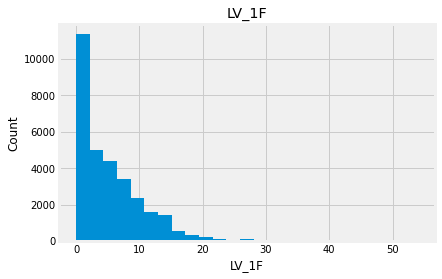

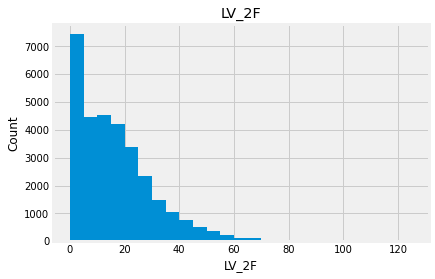

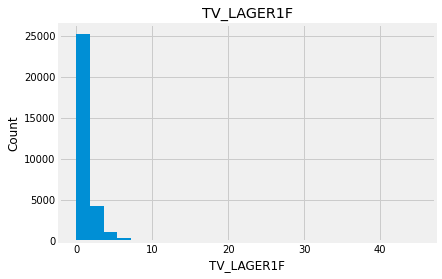

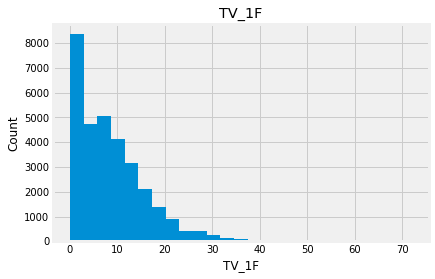

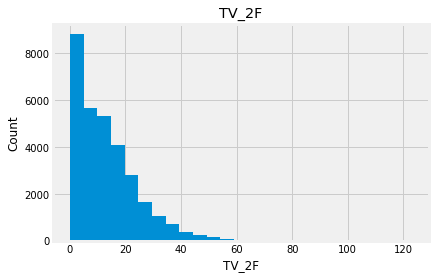

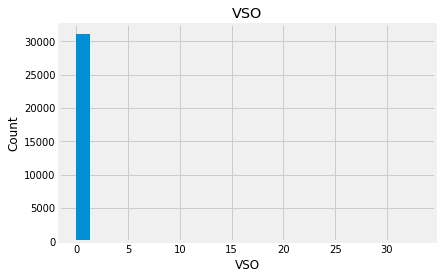

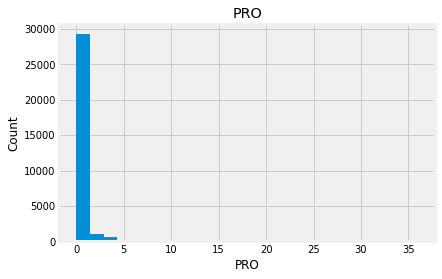

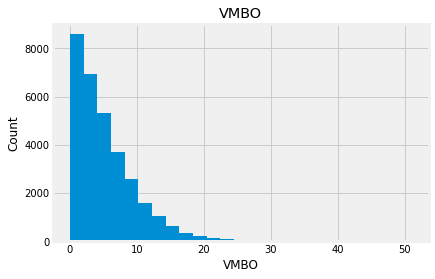

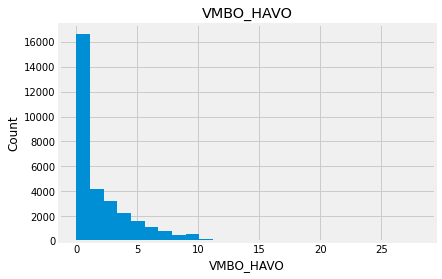

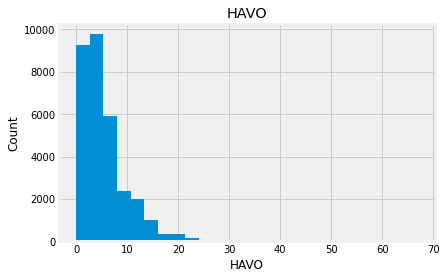

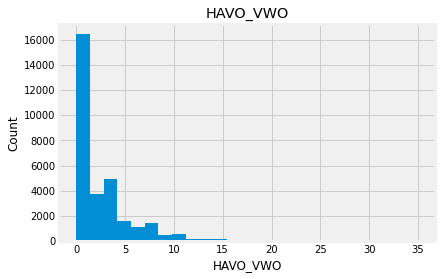

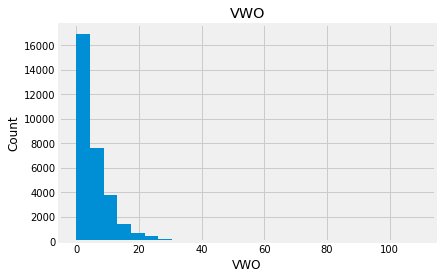

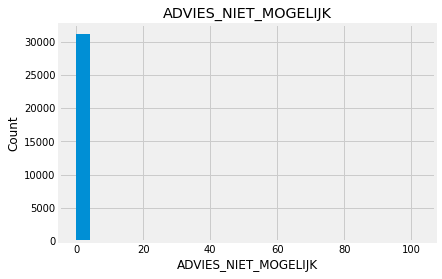

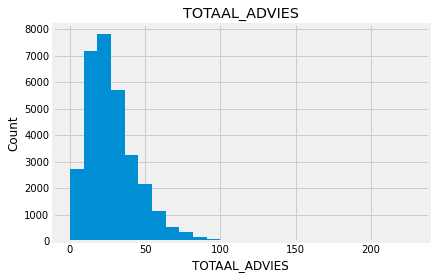

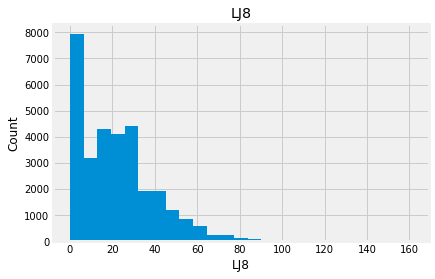

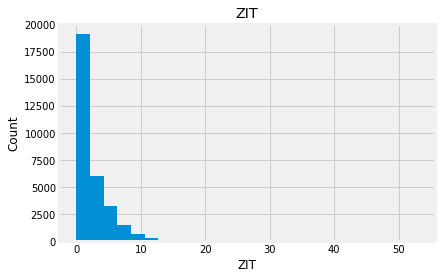

In [195]:
for feature in numeric_data:
    new_data=numeric_data.copy()
    new_data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

Indead we can see that almost non of the variables looks like normal distributed variables. I think it can be because this dataset is a mix of data for different final exams, different school educational system and if we would select some specific data (like exam score for only one type of exam for specific year, for example) we would get more normal data. I will maybe try to do it later or in an other notebooks, because now I would like to continue exploring what info we can get about dataset variables "in general".
Let's go to categorical variables and see what we have there

### Categorical variables

In [196]:
categorical_data = data.drop(numeric_data, axis=1)
categorical_data = categorical_data.drop('SCHOOL_ID', 1)
print(categorical_data.shape)
categorical_data.head()

(31300, 9)


,DATUM,INSTELLINGSNAAM_VESTIGING,POSTCODE_VESTIGING,PLAATSNAAM,GEMEENTENAAM,PROVINCIE,SOORT_PO,DENOMINATIE_VESTIGING,EXAMEN
0,2015,De Schanskorf,2715BT,ZOETERMEER,Zoetermeer,Zuid-Holland,Bo,Gereformeerd vrijgemaakt,CET
1,2015,"BS ""De Maasparel""",6109AM,OHE EN LAAK,Maasgouw,Limburg,Bo,Rooms-Katholiek,CET
2,2015,De Kiezel en de Kei,2971AR,BLESKENSGRAAF CA,Molenwaard,Zuid-Holland,Bo,Openbaar,CET
3,2015,OBS De Klimboom,6666EB,HETEREN,Overbetuwe,Gelderland,Bo,Openbaar,CET
4,2015,Obs Letterwies,9944AR,NIEUWOLDA,Oldambt,Groningen,Bo,Openbaar,CET


Text(0.5, 1.0, 'Amount of schools per year')

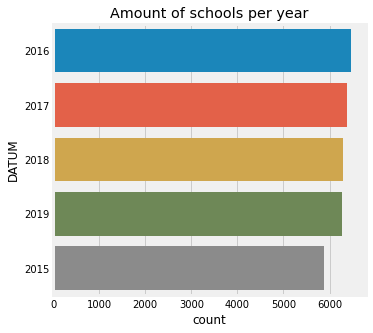

In [197]:
plt.figure(figsize=(5, 5))
ax = sns.countplot(y='DATUM',data=categorical_data, order = data['DATUM'].value_counts().index)
ax.set_title('Amount of schools per year')

Let's take a look at the plots of the variables with relatively small amount of unique values. I will show plot for variables like EXAMEN or GEMEENTENAAM. I won't show plot for the variables like INSTELLINGSNAAM_VESTIGING, because we already know it has 6287 of unique data.

Text(0.5, 1.0, 'Amount of schools per provinces')

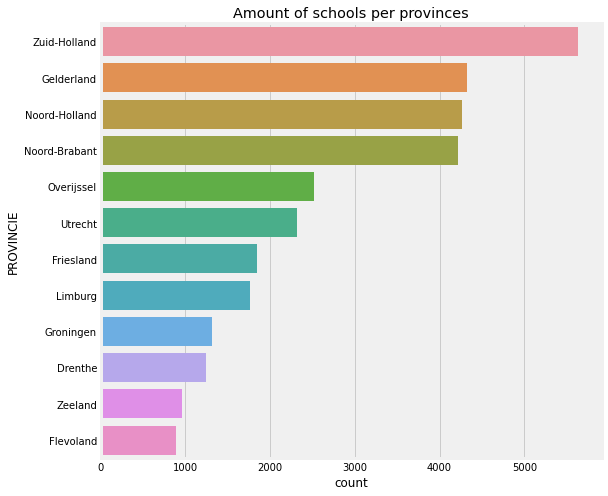

In [198]:
plt.figure(figsize=(8, 8))
ax = sns.countplot(y='PROVINCIE',data=categorical_data, order = data['PROVINCIE'].value_counts().index)
ax.set_title('Amount of schools per provinces')

Text(0.5, 1.0, 'Amount of schools per GEMEENTE')

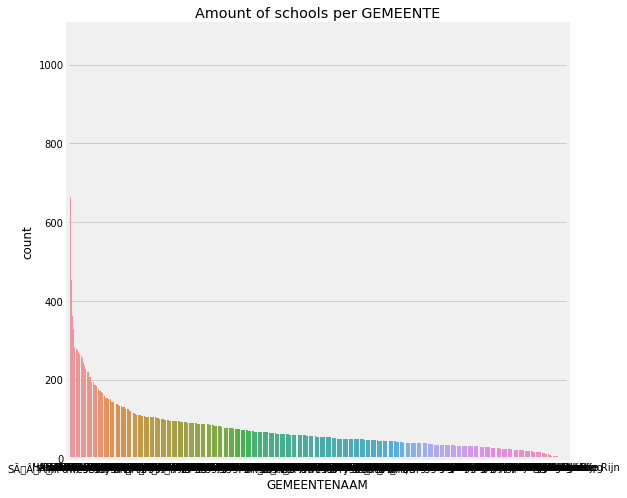

In [199]:
plt.figure(figsize=(8,8))
ax = sns.countplot(x='GEMEENTENAAM',data=categorical_data, order = data['GEMEENTENAAM'].value_counts().index)
ax.set_title('Amount of schools per GEMEENTE')

Text(0.5, 1.0, 'Amount of schools per type')

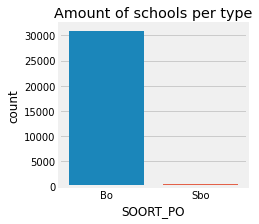

In [200]:
plt.figure(figsize=(3, 3))
ax = sns.countplot(x='SOORT_PO', data=categorical_data, order = data['SOORT_PO'].value_counts().index)
ax.set_title('Amount of schools per type')

Text(0.5, 1.0, 'Amount of schools per denomination')

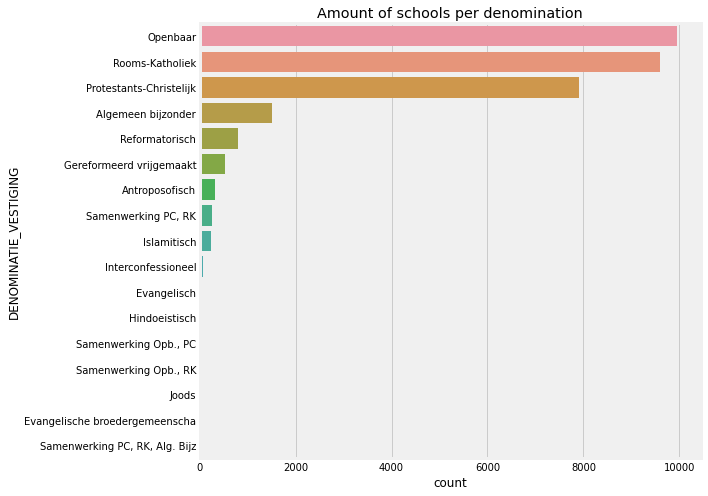

In [201]:
plt.figure(figsize=(8, 8))
ax = sns.countplot(y='DENOMINATIE_VESTIGING',data=categorical_data, order = data['DENOMINATIE_VESTIGING'].value_counts().index)
ax.set_title('Amount of schools per denomination')

Plot above shows us that there are few values of **DENOMINATIE_VESTIGING** columns which has relatively small amounts of observation and probably won't be statistically significant in the entire dataset.

Text(0.5, 1.0, 'Amount of schools per chosen exams')

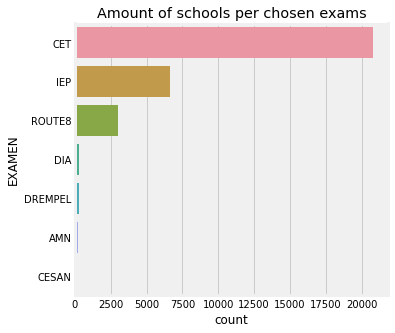

In [202]:
plt.figure(figsize=(5, 5))
ax = sns.countplot(y='EXAMEN',data=categorical_data, order = data['EXAMEN'].value_counts().index)
ax.set_title('Amount of schools per chosen exams')

## Bivariate analysis

In this part I'm going to see is there any relashionship between variables.

### Relationship between continuous variables

To analyse relashionships between continuous variables I will build correlation matrix and then take a look at the scatterplots of ¶the most correlated variables:

<AxesSubplot:title={'center':'Correlation of numeric factors'}>

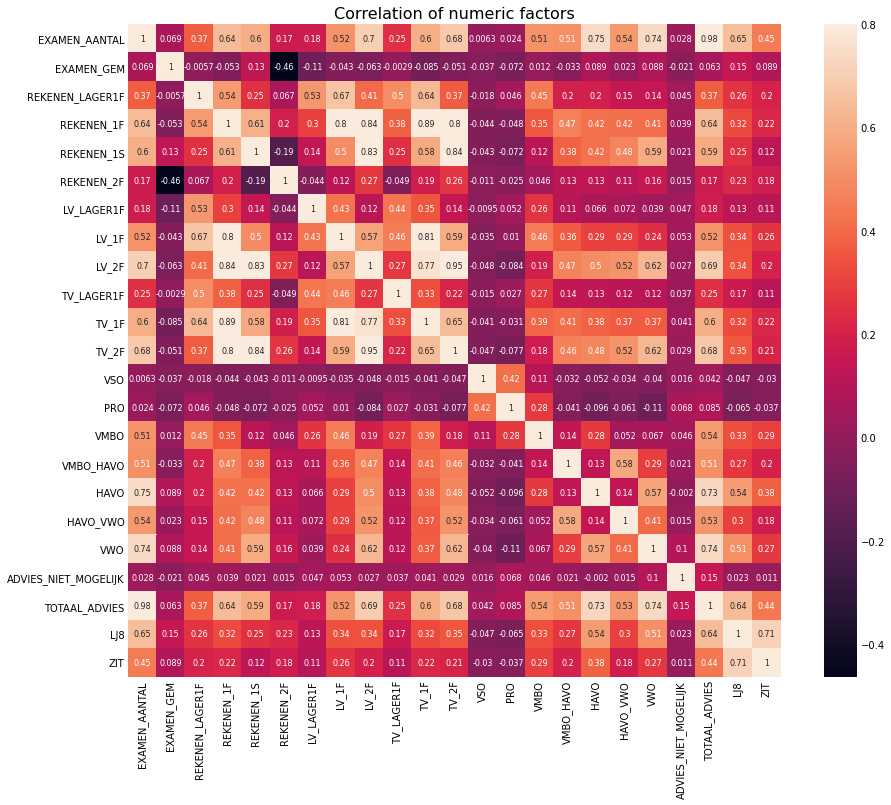

In [203]:
corr_matrix = numeric_data.corr()
f, ax = plt.subplots(figsize = (14,12))
plt.title('Correlation of numeric factors', y = 1, size = 16)
sns.heatmap(corr_matrix, vmax = .8, annot_kws={'size': 8}, annot = True, square=True)

Correlation matrix shows us that there are not a lot of correlated with each other variables. Most of variables which have a correlation between each other are about number of students who know math or language on different levels and numbers of school advices for high education (HAVO_VWO and VWO). Let's take a look at the paired scatterplots of the most correlated variables

In [204]:
numeric_data.columns

Index(['EXAMEN_AANTAL', 'EXAMEN_GEM', 'REKENEN_LAGER1F', 'REKENEN_1F',
       'REKENEN_1S', 'REKENEN_2F', 'LV_LAGER1F', 'LV_1F', 'LV_2F',
       'TV_LAGER1F', 'TV_1F', 'TV_2F', 'VSO', 'PRO', 'VMBO', 'VMBO_HAVO',
       'HAVO', 'HAVO_VWO', 'VWO', 'ADVIES_NIET_MOGELIJK', 'TOTAAL_ADVIES',
       'LJ8', 'ZIT'],
      dtype='object')

In [205]:
columns = ['REKENEN_LAGER1F', 'REKENEN_1F', 'REKENEN_1S', 'REKENEN_2F', 'LV_LAGER1F', 'LV_1F', 'LV_2F',
           'TV_LAGER1F', 'TV_1F', 'TV_2F', 'HAVO_VWO', 'VWO']
corr_data = numeric_data[columns]
corr_data.head()

,REKENEN_LAGER1F,REKENEN_1F,REKENEN_1S,REKENEN_2F,LV_LAGER1F,LV_1F,LV_2F,TV_LAGER1F,TV_1F,TV_2F,HAVO_VWO,VWO
0,0,0,0,0,0,0,0,0,0,0,1,1
1,0,0,0,0,0,0,0,0,0,0,0,6
2,0,0,0,0,0,0,0,0,0,0,2,4
3,0,0,0,0,0,0,0,0,0,0,4,0
4,0,0,0,0,0,0,0,0,0,0,0,2


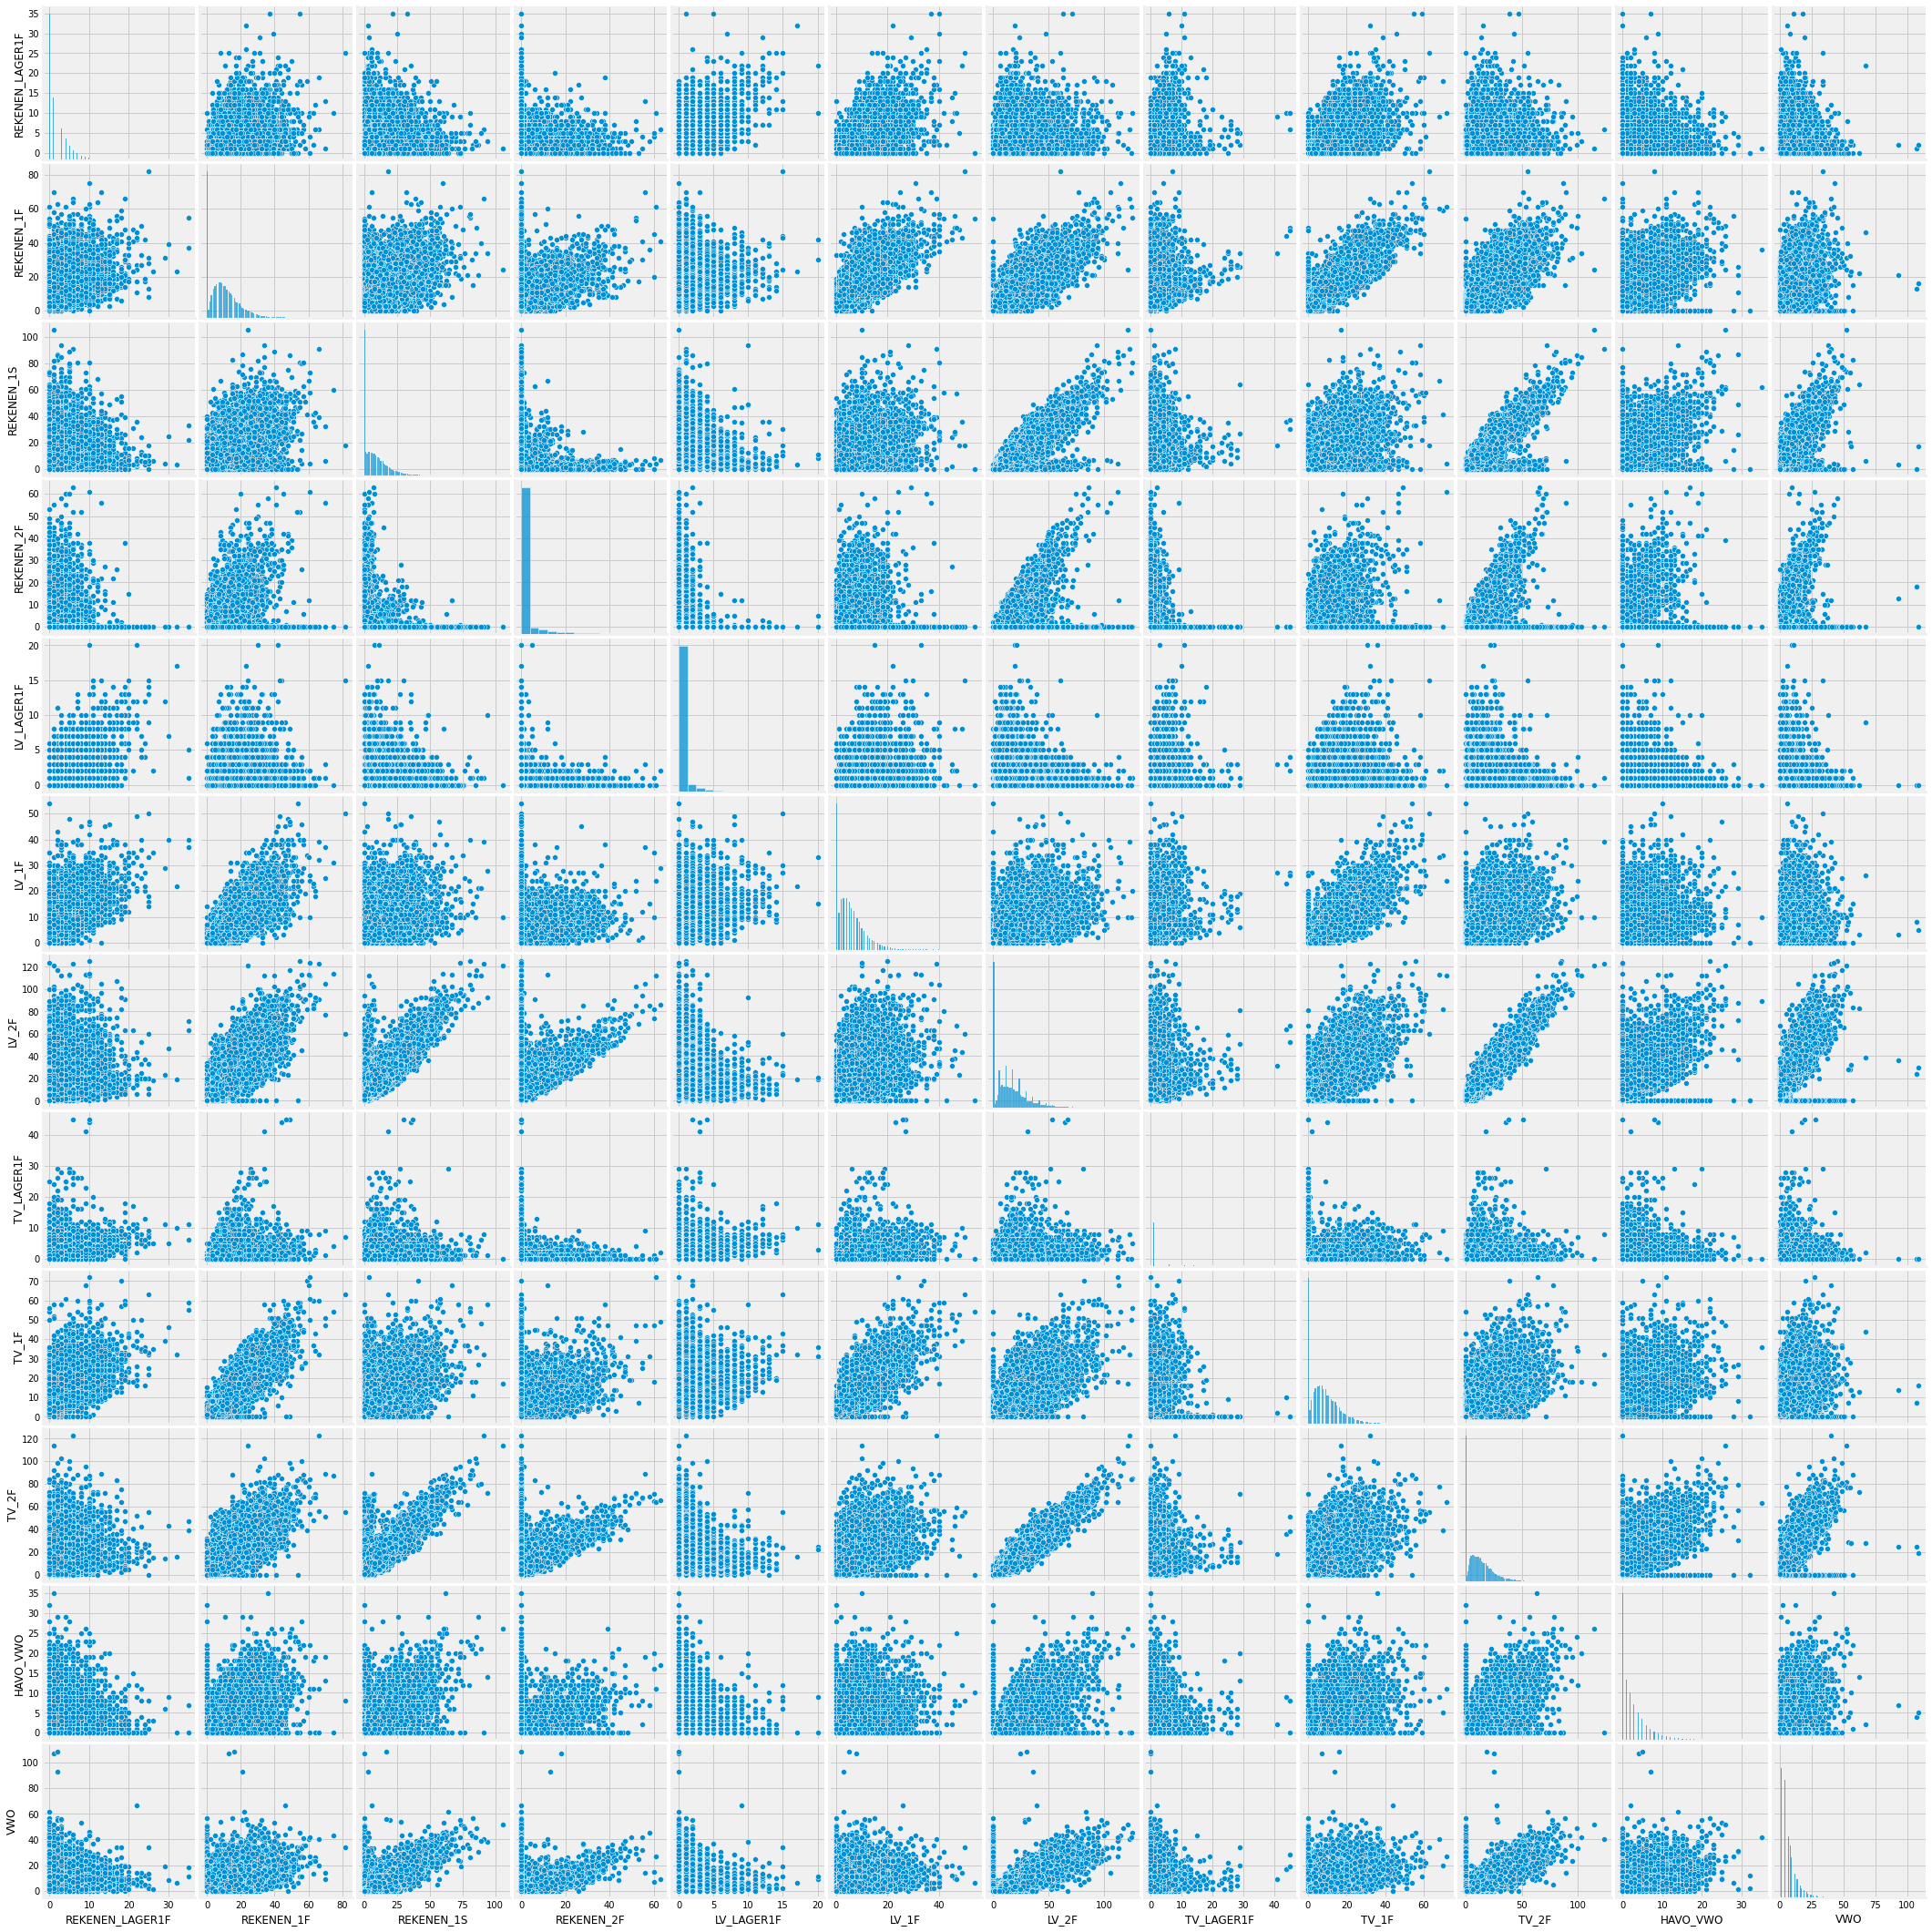

In [206]:
sns.pairplot(corr_data)

I would suggest if in particular school students don't know math very well, they should then know languages better, but looking at the plots above I see some correlation between numbers if students who don't have enough knowledge in different subjects. It's probably not denied my assumption, but just show the level of education that students receive in this school.


### Relationship between categorical variables

We can find the relashionship between categorical variables using 2 ways: encode categorical variables to numeric one and then using correlation matrix or calculated Cramer's V statistic. 
Let's use the first one to see is there any relationship between categorical variables:

In [207]:
from sklearn.preprocessing import LabelEncoder

for column in categorical_data.columns:
    categorical_data[column] = LabelEncoder().fit_transform(categorical_data[column])
print(categorical_data.columns)
categorical_data.head()

Index(['DATUM', 'INSTELLINGSNAAM_VESTIGING', 'POSTCODE_VESTIGING',
       'PLAATSNAAM', 'GEMEENTENAAM', 'PROVINCIE', 'SOORT_PO',
       'DENOMINATIE_VESTIGING', 'EXAMEN'],
      dtype='object')


,DATUM,INSTELLINGSNAAM_VESTIGING,POSTCODE_VESTIGING,PLAATSNAAM,GEMEENTENAAM,PROVINCIE,SOORT_PO,DENOMINATIE_VESTIGING,EXAMEN
0,0,2553,1401,1809,403,11,0,4,2
1,0,147,4026,1134,210,5,0,12,2
2,0,2335,1565,196,227,11,0,9,2
3,0,3993,4354,670,271,3,0,9,2
4,0,4496,6459,1081,253,4,0,9,2


<AxesSubplot:title={'center':'Correlation of numeric factors'}>

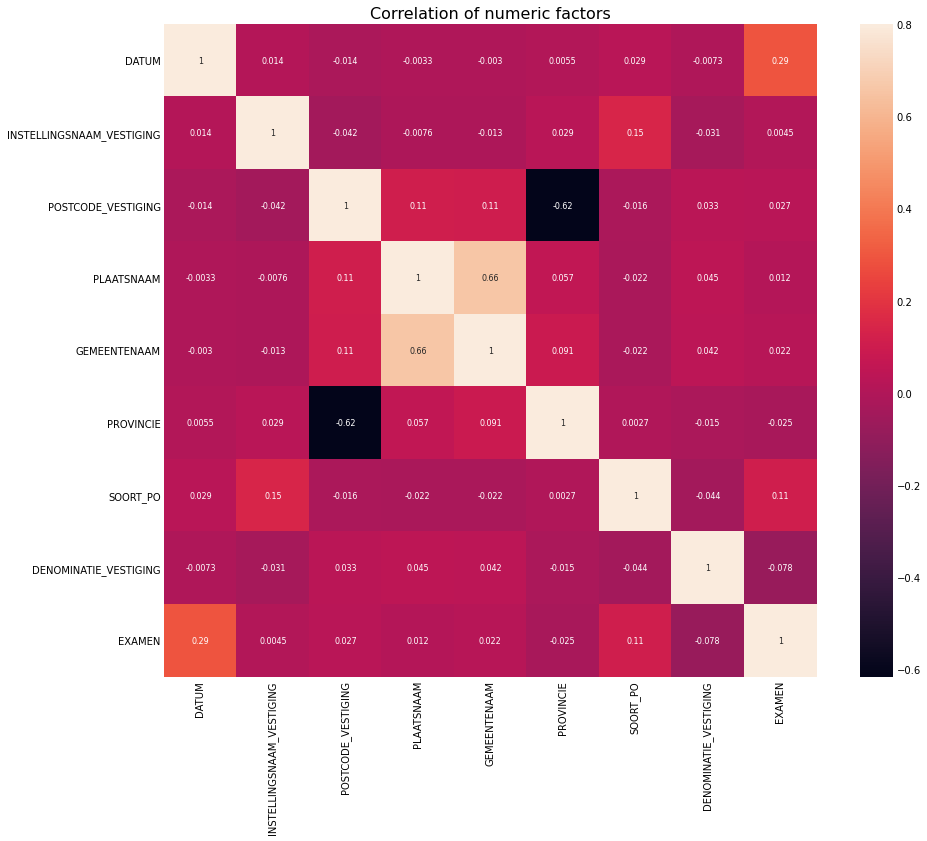

In [208]:
corr_categorical_matrix = categorical_data.corr()
f, ax = plt.subplots(figsize = (14,12))
plt.title('Correlation of numeric factors', y = 1, size = 16)
sns.heatmap(corr_categorical_matrix, vmax = .8, annot_kws={'size': 8}, annot = True, square=True)

We can see almost no correlation between variables, only between **PLAATSNAAM** and **GEMEENTENAAM**, also between **POSTCODE_VESTIGING** and **PROVINCIE**, but it was expected, because this variables represents actually the same info in different forms - place where school located.

## Plots



To get some insights from the data let's add some new variables:

In [213]:
data["GOOD_MATH"] = data['REKENEN_1F'] + data['REKENEN_1S'] + data['REKENEN_2F']
data["GOOD_LANGUAGE"] = data['LV_1F'] + data['LV_2F'] + data['TV_1F'] + data['TV_2F']
data["HIGH_EDUCATION"] = data['HAVO'] + data['HAVO_VWO'] + data['VWO']
data["ZIT_PER"] = data['ZIT']/data['LJ8']
data.head()

,SCHOOL_ID,DATUM,INSTELLINGSNAAM_VESTIGING,POSTCODE_VESTIGING,PLAATSNAAM,GEMEENTENAAM,PROVINCIE,SOORT_PO,DENOMINATIE_VESTIGING,EXAMEN,...,HAVO_VWO,VWO,ADVIES_NIET_MOGELIJK,TOTAAL_ADVIES,LJ8,ZIT,GOOD_MATH,GOOD_LANGUAGE,HIGH_EDUCATION,ZIT_PER
0,000AP_2015,2015,De Schanskorf,2715BT,ZOETERMEER,Zoetermeer,Zuid-Holland,Bo,Gereformeerd vrijgemaakt,CET,...,1,1,0,11,13,0,0,0,7,0.000000
1,000AR_2015,2015,"BS ""De Maasparel""",6109AM,OHE EN LAAK,Maasgouw,Limburg,Bo,Rooms-Katholiek,CET,...,0,6,0,18,17,0,0,0,13,0.000000
2,000AZ_2015,2015,De Kiezel en de Kei,2971AR,BLESKENSGRAAF CA,Molenwaard,Zuid-Holland,Bo,Openbaar,CET,...,2,4,0,22,19,3,0,0,9,0.157895
3,000BA_2015,2015,OBS De Klimboom,6666EB,HETEREN,Overbetuwe,Gelderland,Bo,Openbaar,CET,...,4,0,0,12,24,5,0,0,5,0.208333
4,000BB_2015,2015,Obs Letterwies,9944AR,NIEUWOLDA,Oldambt,Groningen,Bo,Openbaar,CET,...,0,2,0,16,15,2,0,0,7,0.133333


Let's see some plots for this new variables:

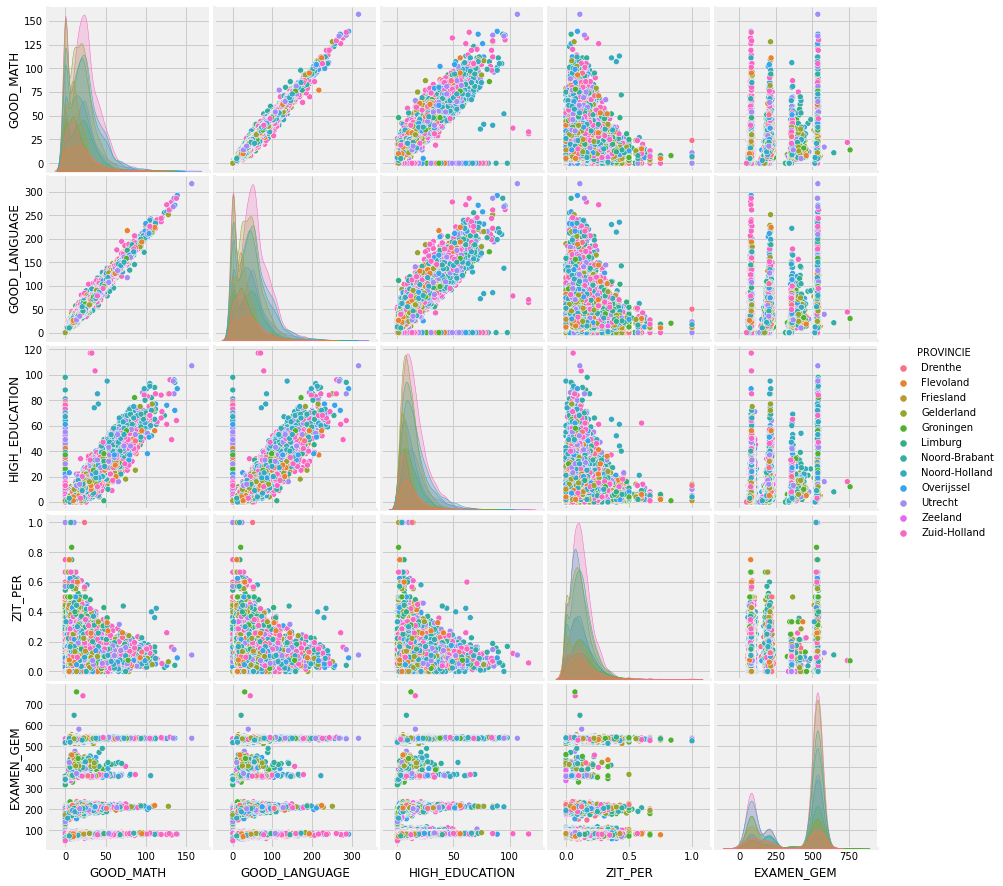

In [237]:
columns = ['GOOD_MATH', 'GOOD_LANGUAGE', 'HIGH_EDUCATION', 'ZIT_PER', 'PROVINCIE']
new_data = data[columns]
sns.pairplot(new_data, hue = 'PROVINCIE')

Plots above shows that probably there is negative relashionship between amount of students who stay in primary school longer and quality of knowledge. We also can see strong positive correlation between good knowledge of math and language and school's recommendation for higher education.
As we see this strong positive correlation, we don't need to explore all 3 columns ('GOOD_MATH', 'GOOD_LANGUAGE' and 'HIGH_EDUCATION'), but we can see the plots for only one of them to other interesting variables:

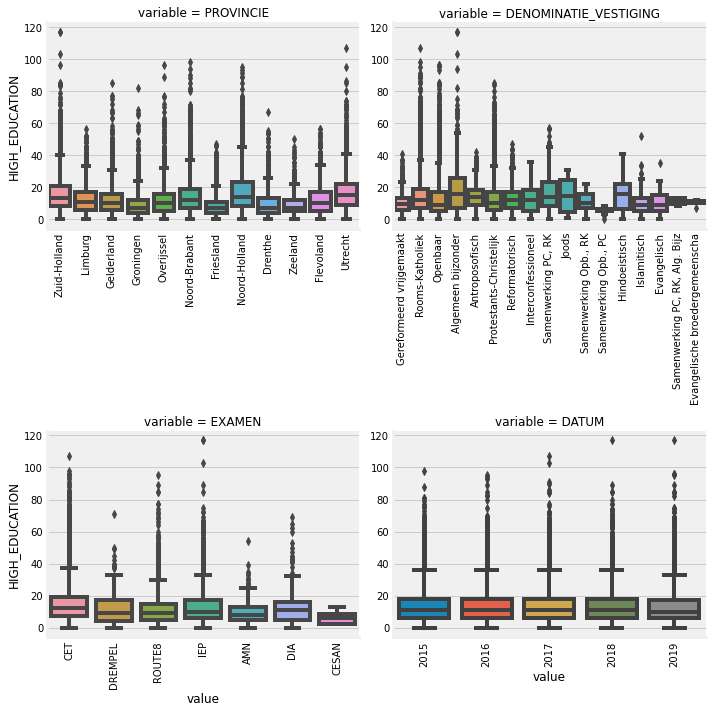

In [222]:
categorical_features = ['PROVINCIE', 'DENOMINATIE_VESTIGING', 'EXAMEN', 'DATUM']
for column in categorical_features:
    data[column] = data[column].astype('category')
    if data[column].isnull().any():
        data[column] = data[column].cat.add_categories(['MISSING'])
        data[column] = data[column].fillna('MISSING')
        
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)

f = pd.melt(data, id_vars=['HIGH_EDUCATION'], value_vars=categorical_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, "value", "HIGH_EDUCATION")

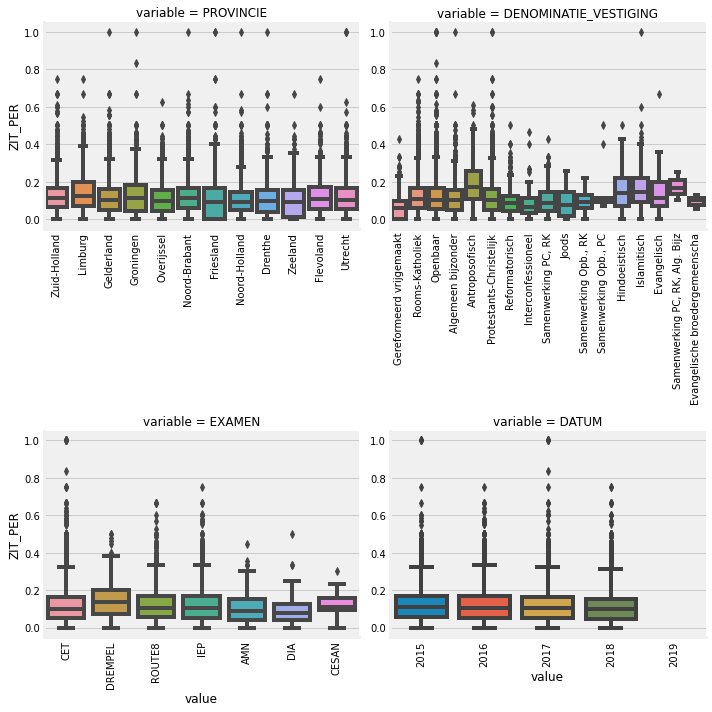

In [223]:
f = pd.melt(data, id_vars=['ZIT_PER'], value_vars=categorical_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, "value", "ZIT_PER")

And finally let's take a look at some plots for CET exam:

In [225]:
data_CET = data[data['EXAMEN'] == "CET"]

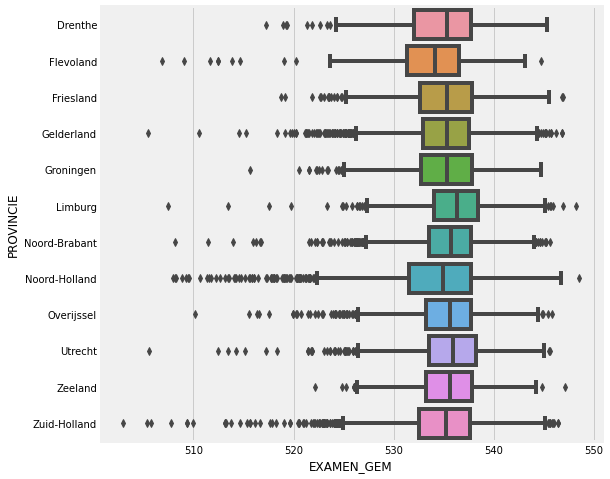

In [226]:
f, ax = plt.subplots(figsize=(8, 8))
fig = sns.boxplot(x='EXAMEN_GEM', y="PROVINCIE", data=data_CET)

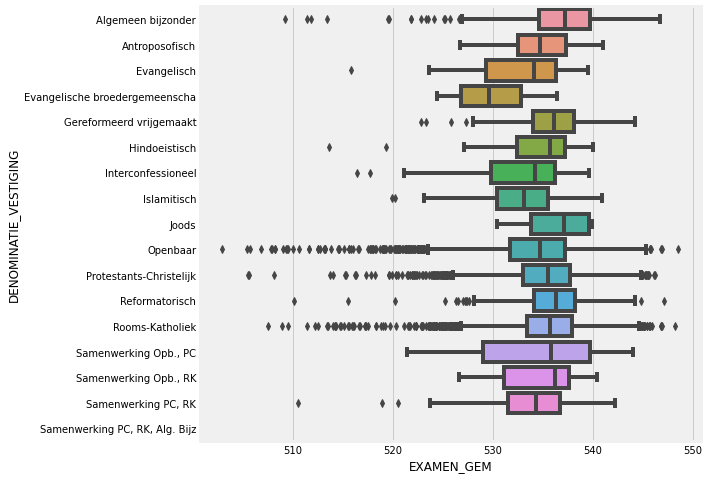

In [235]:
f, ax = plt.subplots(figsize=(8, 8))
fig = sns.boxplot(x='EXAMEN_GEM', y="DENOMINATIE_VESTIGING", data=data_CET)

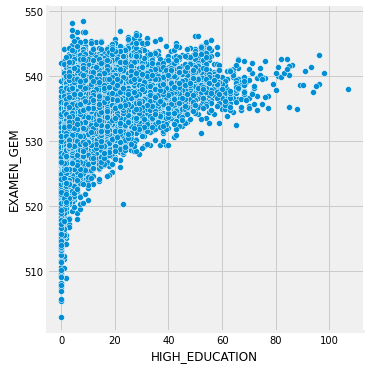

In [231]:
sns.relplot("HIGH_EDUCATION", "EXAMEN_GEM", data=data_CET)

We can see on the plot above that the higher CET score, the bigger amount of students gets advice for high education.

## Conclusion

As a result of this data analysis I can say that we have data about schools in The Netherlands for years 2015-2018, it contains mostly info about school location, score on the final exams, number of students on different level of knowledge and data about school advice for secondary education.
After looking at this dataset and plots built out of this data, I can conclude that students who have good knowledge in math and language have bigger chance to get school advice for high education. Also we can say from this analysis that quality of education in the school could be estimated by the average score on final exam or number of students who knows well math and language.